# Soft kompjuting

## Slike, konvolucija, regioni

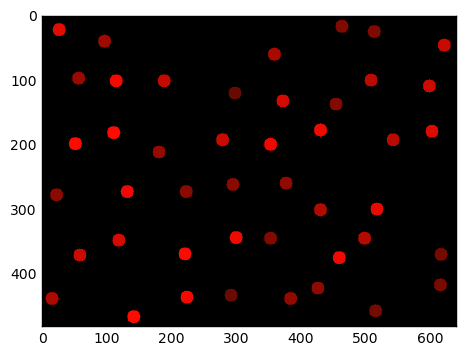

In [1]:
import matplotlib.pyplot as plt  # za prikaz slika, grafika, itd.
%matplotlib inline
# %matplotlib inline je komanda za prikaz slika i grafika unutar notebook-a (ne koristiti u običnim skriptama!!!)

import numpy as np
from skimage.io import imread
from scipy import ndimage

img = imread('images/img-0-45.png')  # img je Numpy array
plt.imshow(img)  # imshow je funkcija za prikaz slike (u formatu Numpy array-a)

## Konverzija slike u nijanse sive

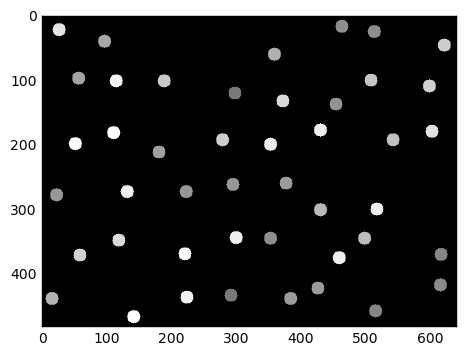

In [2]:
# implementacija metode perceptivne osvetljenosti
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray

img_gray = my_rgb2gray(img)
plt.imshow(img_gray, 'gray')

## Binarizacija slike

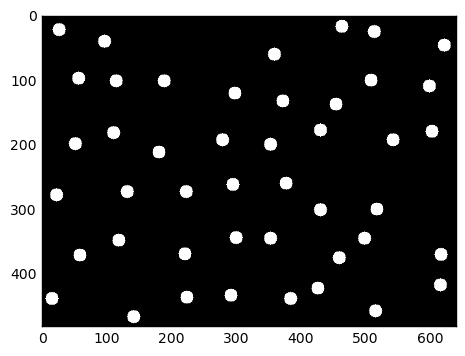

In [3]:
img_tr = img_gray > 0.5  # svi piskeli koji su veci od 0.5 ce dobiti vrednost True, tj. 1, i obrnuto
plt.imshow(img_tr, 'gray')

## regioni od interesa

45


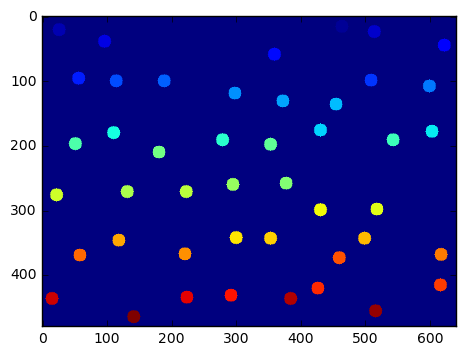

In [4]:
labeled, nr_objects = ndimage.label(img_tr)
print nr_objects
plt.imshow(labeled)

## Malo komplikovanije

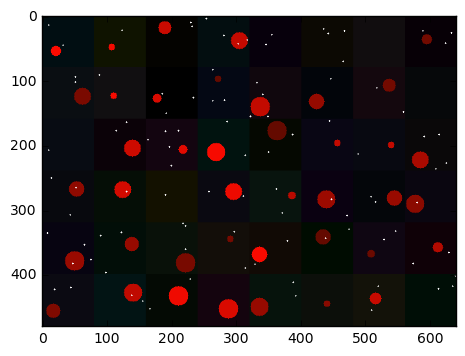

In [5]:
img = imread('images/img-0-41.png')  # img je Numpy array
plt.imshow(img)  

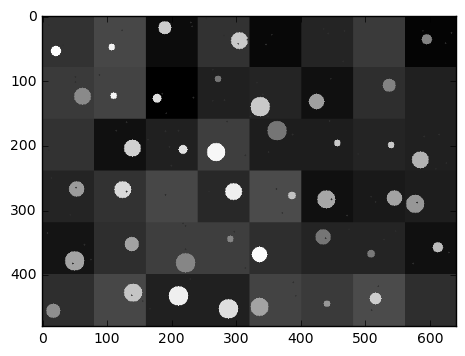

In [6]:
img_gray = my_rgb2gray(img)
plt.imshow(img_gray, 'gray')

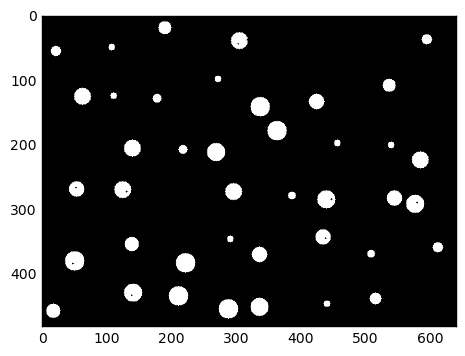

In [7]:
#print img_gray.max(axis=1)
img_tr = img_gray > 20 
plt.imshow(img_tr, 'gray')

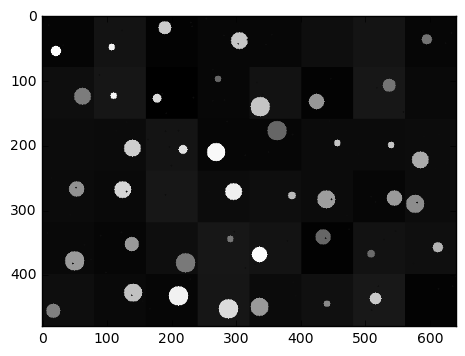

In [8]:
def my2_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.77*img_rgb[:, :, 0] + 0.21*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray
img = imread('images/img-0-41.png')
img_gray = my2_rgb2gray(img)
plt.imshow(img_gray, 'gray')


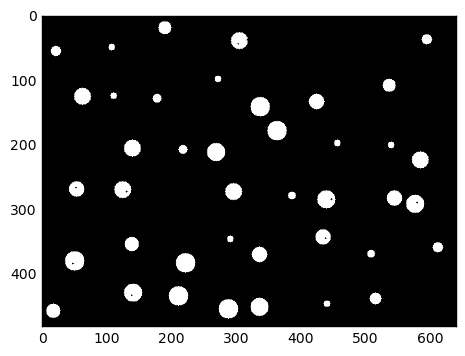

In [9]:
img_tr = img_gray > 20
plt.imshow(img_tr, 'gray')

42


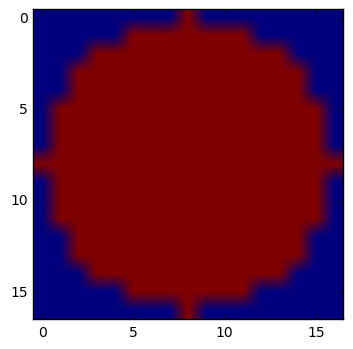

In [10]:
labeled, nr_objects = ndimage.label(img_tr)
print nr_objects
obj = labeled==3
plt.imshow(obj)
vert = obj.max(axis=0)
v = labeled[:, vert]
obj2 = v ==3
hori = obj2.max(axis=1)

plt.imshow(v[hori,:])


## Još komplikovanije

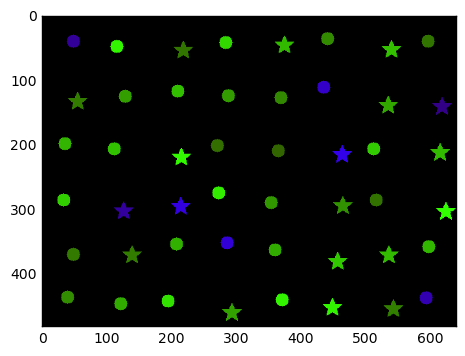

In [11]:
img = imread('images/img-9-48.png')  # img je Numpy array
plt.imshow(img)  

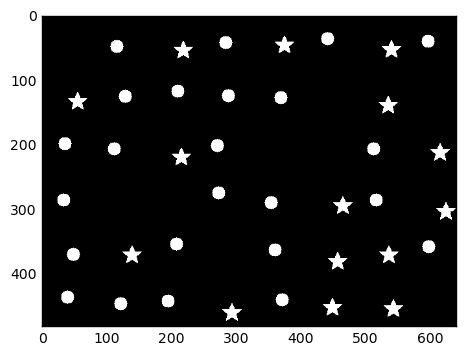

In [12]:
img_gray = my2_rgb2gray(img)
img_tr = img_gray > 60
plt.imshow(img_tr, 'gray')

39


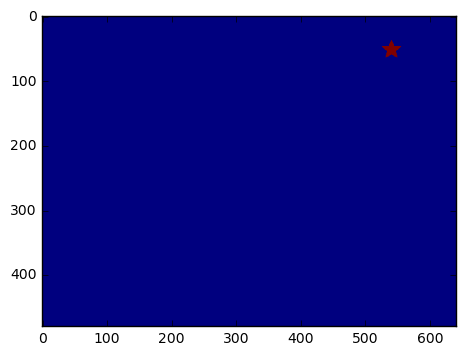

In [13]:
labeled, nr_objects = ndimage.label(img_tr)
print nr_objects
obj = labeled==6
plt.imshow(obj)

(27, 30)


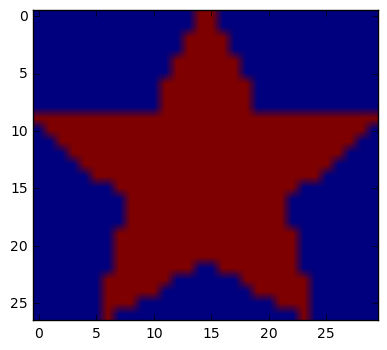

In [14]:
vert = obj.max(axis=0)
v = labeled[:, vert]
obj2 = v ==6
hori = obj2.max(axis=1)

roi = v[hori,:]
print roi.shape
plt.imshow(roi)